<a href="https://colab.research.google.com/github/jongoh-Jeong/MachineLearning-for-AI/blob/main/ML4AI_project_jjo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML4AI

### Set up for Project

#### Library

In [1]:
import pandas as pd
import numpy as np

#pip install -U pandas_profiling
import pandas_profiling as Profiling



In [2]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [3]:
# Modeling
import sklearn
assert sklearn.__version__ >= "0.20"

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

from sklearn.svm import SVC

#### Data Load

In [4]:
df_train = pd.read_csv("/content/drive/MyDrive/ML4AI/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/ML4AI/test.csv")

## Data EDA

#### **Basic EDA**

In [5]:
df_train.head()

index gender car reality  child_num  income_total           income_type  \
0      0      F   N       N          0      202500.0  Commercial associate   
1      1      F   N       Y          1      247500.0  Commercial associate   
2      2      M   Y       Y          0      450000.0               Working   
3      3      F   N       Y          0      202500.0  Commercial associate   
4      4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0      -13899          -4709           1           0      0      0   
1      -11380          -1540           1           0      0      1   
2      -19087          -4434           1           0      1      0   
3      -15088          -2092           1           0      1      0   
4      -15037          -2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0          NaN          2.0         -6.0     1.0  
1     Laborers          3.0         -5.0     1.0  
2     Managers          2.0        -22.0     2.0  
3  Sales staff          2.0        -37.0     0.0  
4     Managers          2.0        -26.0     2.0

In [6]:
df_train.shape

(26457, 20)

In [7]:
df_train.describe()

index     child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED  \
count  26457.000000  26457.000000  2.645700e+04  26457.000000   26457.000000   
mean   13228.000000      0.428658  1.873065e+05 -15958.053899   59068.750728   
std     7637.622372      0.747326  1.018784e+05   4201.589022  137475.427503   
min        0.000000      0.000000  2.700000e+04 -25152.000000  -15713.000000   
25%     6614.000000      0.000000  1.215000e+05 -19431.000000   -3153.000000   
50%    13228.000000      0.000000  1.575000e+05 -15547.000000   -1539.000000   
75%    19842.000000      1.000000  2.250000e+05 -12446.000000    -407.000000   
max    26456.000000     19.000000  1.575000e+06  -7705.000000  365243.000000   

       FLAG_MOBIL    work_phone         phone         email   family_size  \
count     26457.0  26457.000000  26457.000000  26457.000000  26457.000000   
mean          1.0      0.224742      0.294251      0.091280      2.196848   
std           0.0      0.417420      0.455714      0.288013      0.916717   
min           1.0      0.000000      0.000000      0.000000      1.000000   
25%           1.0      0.000000      0.000000      0.000000      2.000000   
50%           1.0      0.000000      0.000000      0.000000      2.000000   
75%           1.0      0.000000      1.000000      0.000000      3.000000   
max           1.0      1.000000      1.000000      1.000000     20.000000   

        begin_month        credit  
count  26457.000000  26457.000000  
mean     -26.123294      1.519560  
std       16.559550      0.702283  
min      -60.000000      0.000000  
25%      -39.000000      1.000000  
50%      -24.000000      2.000000  
75%      -12.000000      2.000000  
max        0.000000      2.000000

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

> **Variable Description** (By Dacon Data Description)
- index : 인덱스
- gender: 성별
- car: 차량 소유 여부
- reality: 부동산 소유 여부
- child_num: 자녀 수
- income_total: 연간 소득
- income_type: 소득 분류 <br>
⇒['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- edu_type: 교육 수준 <br>
⇒['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- family_type: 결혼 여부<br> 
⇒['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- house_type: 생활 방식 <br>
⇒ ['Municipal apartment', 'House / apartment', 'With parents','Co-op apartment', 'Rented apartment', 'Office apartment']
- DAYS_BIRTH: 출생일 <br>
⇒ 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- DAYS_EMPLOYED: 업무 시작일<br>
⇒ 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미(양수 값은 고용되지 않은 상태를 의미함)
- FLAG_MOBIL: 핸드폰 소유 여부
- work_phone: 업무용 전화 소유 여부
- phone: 전화 소유 여부
- email: 이메일 소유 여부
- occyp_type: 직업 유형													
- family_size: 가족 규모
- begin_month: 신용카드 발급 월 <br> 
⇒ 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- credit: 사용자의 신용카드 대금 연체를 기준으로 한 신용도 <br>
⇒ 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [9]:
df_train.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [10]:
df_test.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

- "occyp_type" is only feature that contsins missing values 

In [11]:
df_train.fillna({'occyp_type':np.NAN},inplace = True)
df_test.fillna({'occyp_type':np.NAN},inplace = True)
df_train.isna().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [12]:
df_train['occyp_type'].value_counts()

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

DAYS_BIRTH, DAYS_EMPLOYED, BIGIN_MONTH is calculated by days from data collect. <br> 
$\Rightarrow$ If days_birth is 1, then it means that the observation is borned one day before data collecting has processed. <br>
$\Rightarrow$ So Observations that has positive days_employeed is replaced "No Job" <br>
$\Rightarrow$ Then we replace negative sign to positive sign, Under the assumption that there's mistake in sign enter. 

In [13]:
df_train['DAYS_EMPLOYED'] = df_train['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)
df_test['DAYS_EMPLOYED'] = df_test['DAYS_EMPLOYED'].map(lambda x: 0 if x > 0 else x)

In [14]:
Nojob_idx_tr = df_train[(df_train.occyp_type.isna()) & (df_train.DAYS_EMPLOYED==0) ].index
df_train.loc[Nojob_idx_tr,'occyp_type'] = 'No job' 

In [15]:
Nojob_idx_te = df_test[(df_test.occyp_type.isna()) & (df_test.DAYS_EMPLOYED==0) ].index
df_test.loc[Nojob_idx_te,'occyp_type'] = 'No job' 

In [16]:
Unknownjob_idx_tr = df_train[(df_train.occyp_type.isna()) & (df_train.DAYS_EMPLOYED<0) ].index
df_train.loc[Unknownjob_idx_tr,'occyp_type'] = "Unknown"

In [17]:
Unknownjob_idx_te = df_test[(df_test.occyp_type.isna()) & (df_test.DAYS_EMPLOYED<0) ].index
df_test.loc[Unknownjob_idx_te,'occyp_type'] = "Unknown"

In [18]:
df_train[df_train['occyp_type'].isin(['No job','Unknown'])].shape[0]

8171

In [19]:
# Check for Days Employed < 0 and No job 
df_train[(df_train['DAYS_EMPLOYED']<0) & (df_train['occyp_type'].isin(['No job']))].shape[0]

0

In [20]:
df_train['occyp_type'].value_counts()

Laborers                 4512
No job                   4438
Unknown                  3733
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [21]:
var_lst = ['DAYS_BIRTH', 'begin_month', 'DAYS_EMPLOYED']
for var in var_lst:
    df_train[var]=np.abs(df_train[var])
    df_test[var] = np.abs(df_test[var])

In [22]:
df_train.describe()

index     child_num  income_total    DAYS_BIRTH  DAYS_EMPLOYED  \
count  26457.000000  26457.000000  2.645700e+04  26457.000000   26457.000000   
mean   13228.000000      0.428658  1.873065e+05  15958.053899    2198.529538   
std     7637.622372      0.747326  1.018784e+05   4201.589022    2370.140530   
min        0.000000      0.000000  2.700000e+04   7705.000000       0.000000   
25%     6614.000000      0.000000  1.215000e+05  12446.000000     407.000000   
50%    13228.000000      0.000000  1.575000e+05  15547.000000    1539.000000   
75%    19842.000000      1.000000  2.250000e+05  19431.000000    3153.000000   
max    26456.000000     19.000000  1.575000e+06  25152.000000   15713.000000   

       FLAG_MOBIL    work_phone         phone         email   family_size  \
count     26457.0  26457.000000  26457.000000  26457.000000  26457.000000   
mean          1.0      0.224742      0.294251      0.091280      2.196848   
std           0.0      0.417420      0.455714      0.288013      0.916717   
min           1.0      0.000000      0.000000      0.000000      1.000000   
25%           1.0      0.000000      0.000000      0.000000      2.000000   
50%           1.0      0.000000      0.000000      0.000000      2.000000   
75%           1.0      0.000000      1.000000      0.000000      3.000000   
max           1.0      1.000000      1.000000      1.000000     20.000000   

        begin_month        credit  
count  26457.000000  26457.000000  
mean      26.123294      1.519560  
std       16.559550      0.702283  
min        0.000000      0.000000  
25%       12.000000      1.000000  
50%       24.000000      2.000000  
75%       39.000000      2.000000  
max       60.000000      2.000000

- 신용도는 세 가지 범주(2.0, 1.0, 0.0)로 구분되어 있으며, 2.0에 과반수 데이터가 밀집되어있는 것을 알 수 있다.

In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     26457 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

#### **Detail EDA for using Profiling**

In [24]:
Profiling.ProfileReport(df_train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

> **Result of more detailed EDA by using profiling**
- Data has 11 categorical features, 2 Boolean features, 6 numeric features.
- For "FlAG-MOBIL", there's only one value '1'. <br>
⇒ As everyone has mobile, so its importance to predict credit doesn't exist. Then we need to remove that.
- There's data imblancing for some features like "house_type","child_num" etc.
- There's strong correlattions between "income_type" and "Days_Employeed", "family_size" and "child_num".


#### **Data EDA by using Visualization**

In [25]:
df_train.head()

df_index gender car reality  child_num  income_total           income_type  \
0         0      F   N       N          0      202500.0  Commercial associate   
1         1      F   N       Y          1      247500.0  Commercial associate   
2         2      M   Y       Y          0      450000.0               Working   
3         3      F   N       Y          0      202500.0  Commercial associate   
4         4      F   Y       Y          0      157500.0         State servant   

                        edu_type     family_type           house_type  \
0               Higher education         Married  Municipal apartment   
1  Secondary / secondary special  Civil marriage    House / apartment   
2               Higher education         Married    House / apartment   
3  Secondary / secondary special         Married    House / apartment   
4               Higher education         Married    House / apartment   

   DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  work_phone  phone  email  \
0       13899           4709           1           0      0      0   
1       11380           1540           1           0      0      1   
2       19087           4434           1           0      1      0   
3       15088           2092           1           0      1      0   
4       15037           2105           1           0      0      0   

    occyp_type  family_size  begin_month  credit  
0      Unknown          2.0          6.0     1.0  
1     Laborers          3.0          5.0     1.0  
2     Managers          2.0         22.0     2.0  
3  Sales staff          2.0         37.0     0.0  
4     Managers          2.0         26.0     2.0

1) Categorical Data, Boolean Data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


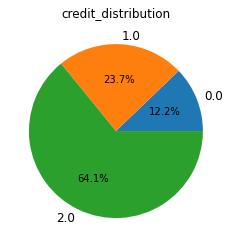

In [26]:
df_train_table_credit = df_train.pivot_table(index = 'credit',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_credit,labels = df_train_table_credit.index,autopct='%1.1f%%',)
plt.title('credit_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


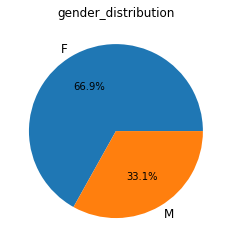

In [27]:
df_train_table_gender = df_train.pivot_table(index = 'gender',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_gender,labels = df_train_table_gender.index,autopct='%1.1f%%')
plt.title('gender_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


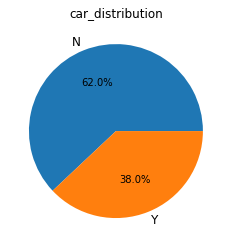

In [28]:
df_train_table_car = df_train.pivot_table(index = 'car',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_car,labels = df_train_table_car.index,autopct='%1.1f%%')
plt.title('car_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


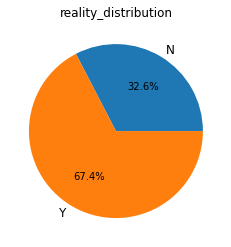

In [29]:
df_train_table_reality = df_train.pivot_table(index = 'reality',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_reality,labels = df_train_table_reality.index,autopct='%1.1f%%')
plt.title('reality_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


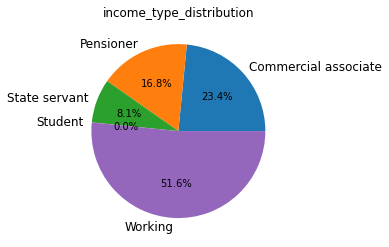

In [30]:
df_train_table_income_type = df_train.pivot_table(index = 'income_type',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_income_type,labels = df_train_table_income_type.index,autopct='%1.1f%%')
plt.title('income_type_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


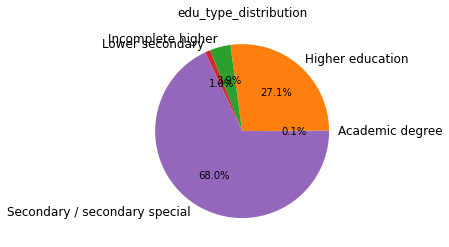

In [31]:
df_train_table_edu_type = df_train.pivot_table(index = 'edu_type',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_edu_type,labels = df_train_table_edu_type.index,autopct='%1.1f%%')
plt.title('edu_type_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


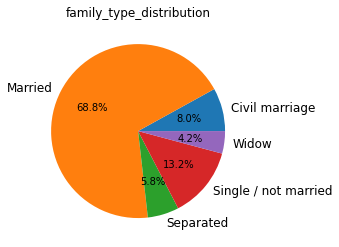

In [32]:
df_train_table_family_type = df_train.pivot_table(index = 'family_type',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_family_type,labels = df_train_table_family_type.index,autopct='%1.1f%%')
plt.title('family_type_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


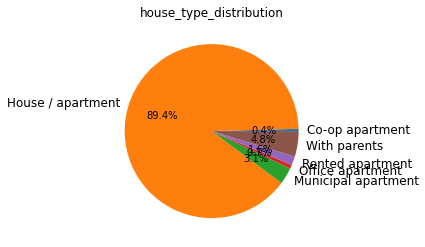

In [33]:
df_train_table_house_type = df_train.pivot_table(index = 'house_type',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_house_type,labels = df_train_table_house_type.index,autopct='%1.1f%%')
plt.title('house_type_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


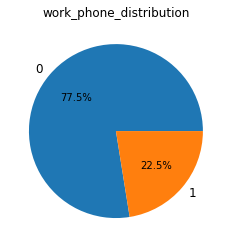

In [34]:
df_train_table_work_phone = df_train.pivot_table(index = 'work_phone',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_work_phone,labels = df_train_table_work_phone.index,autopct='%1.1f%%')
plt.title('work_phone_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


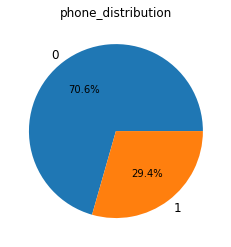

In [35]:
df_train_table_phone = df_train.pivot_table(index = 'phone',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_phone,labels = df_train_table_phone.index,autopct='%1.1f%%')
plt.title('phone_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


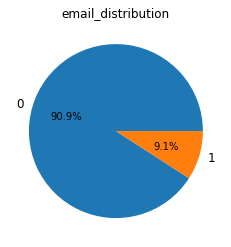

In [36]:
df_train_table_email = df_train.pivot_table(index = 'email',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_email,labels = df_train_table_email.index,autopct='%1.1f%%')
plt.title('email_distribution')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


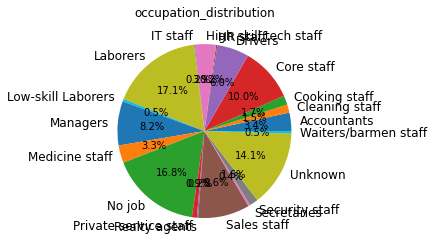

In [37]:
df_train_table_occyp_type = df_train.pivot_table(index = 'occyp_type',values = 'df_index', aggfunc = 'count').rename(columns = {'df_index':'counts'})
plt.pie(df_train_table_occyp_type,labels = df_train_table_occyp_type.index,autopct='%1.1f%%')
plt.title('occupation_distribution')
plt.show()

> Categorical Data
- There's Data Imbalancing all categorical data except for "occyp_type"

2) Numeric Data

## Data modeling

### Data Preprocessing for construct model

1) Encoding of categorical features

In [39]:
target_col = 'credit'

cat_cols = [x for x in df_train.columns if df_train[x].dtype == 'object']
float_cols = [x for x in df_train.columns.drop('credit') if df_train[x].dtype == 'float64']
num_cols = [x for x in df_train.columns if x not in cat_cols + [target_col]]
feature_cols = num_cols + cat_cols

Encoder = LabelEncoder()
for i in cat_cols:
    df_train[i] = Encoder.fit_transform(df_train[i].astype(str))
    df_test[i] = Encoder.transform(df_test[i].astype(str))
    
for i in float_cols:
    df_train[i] = df_train[i].astype('int')
    df_test[i] = df_test[i].astype('int')

3) Data Split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(df_train.loc[:,df_train.columns != 'credit'], df_train['credit'], test_size = 0.2)

2) Feature scaling

In [43]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Modeling

In [44]:
from sklearn.svm import SVC
 
svm_model = SVC(kernel='rbf', C=8, gamma=0.1)
 
svm_model.fit(X_train, y_train)



SVC(C=8, gamma=0.1)

In [46]:
y_pred = svm_model.predict(X_test)

### Score the model

In [47]:
print("prediction accuracy: {:.2f}".format(np.mean(y_pred == y_test)))

prediction accuracy: 0.67
